<a href="https://colab.research.google.com/github/caglarmert/DI725/blob/main/DI725_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DI 725: Transformers and Attention-Based Deep Networks

## A Tutorial for Visualizing Vision Transformers (ViT) and CNN-based Architectures

The purpose of this notebook is to introduce how vision transformers work.

In this notebook, we will be inverting the process of image classification networks. We will freeze the body of the network to find the image composition that activates the network the most for a given target class.

### Author:
* Ümit Mert Çağlar

## Imports

We import libraries like [Torch](https://pytorch.org/), [Torchvision](https://pytorch.org/vision/stable/index.html), Python Imaging Library (PIL), [tqdm](https://tqdm.github.io/)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import PIL
from torchvision.transforms.functional import to_pil_image
from tqdm import tqdm
import matplotlib.pyplot as plt
import warnings


## Loading the Model
Here we are loading our model, i.e., ResNet or ViT, from torchvision library.

In [ ]:
model = torchvision.models.resnet50(pretrained=True).eval().to("cuda")



## Random Initialization
Random initialization of image-like object is required to start our operation.

In [ ]:
img = torch.randn(1, 3, 224, 224,
                  requires_grad=True, device="cuda")

## Define Optimizer
Define the optimizer we are going to use. Here we are using [AdamW](https://huggingface.co/docs/bitsandbytes/main/en/reference/optim/adamw), the trainable parameters are set as the dummy image we have set before (random init), and finally the learning rate is defined.

In [ ]:
optimizer = torch.optim.AdamW(
    params=[img],
    lr=0.2,
)

## Normalize Images
To normalize RGB images, the following normalization function will be applied for the model to learn properly.

In [ ]:
normalize_fn = torchvision.transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])

# Training Loop
Select a target class, for example 76 for tarantula, and train the "image" so that it maximizes the activations regarding the tarantula class. This is the inverse of what we normally do.

In [ ]:
target_class = 76
for i in tqdm(range(250)):
    normalized_img = normalize_fn(img)
    logits = model(normalized_img)
    labels = torch.tensor([target_class], dtype=torch.uint8).to("cuda")
    loss = torch.nn.CrossEntropyLoss()(logits, labels)

    # Backpropagation and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

## Resnet Results
The inputs of the ResNet architecture, that maximizes the tarantula class activations are as follows:

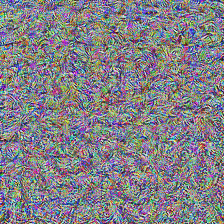

In [ ]:
pil_img = to_pil_image(torch.nn.functional.sigmoid(img.squeeze(0)))
pil_img

In [ ]:


target_class = 76
model = torchvision.models.resnet50(pretrained=True).eval().to("cuda")

img = torch.randn(1, 3, 224, 224,
                  requires_grad=True, device="cuda")


optimizer = torch.optim.AdamW(
    params=[img],
    lr=0.2,
)
normalize_fn = torchvision.transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225])

######################################################################
##                         Training loop                            ##
######################################################################


for i in tqdm(range(250)):
    normalized_img = normalize_fn(img)
    logits = model(normalized_img)
    labels = torch.tensor([target_class], dtype=torch.uint8).to("cuda")
    loss = torch.nn.CrossEntropyLoss()(logits, labels)

    # Backpropagation and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()





/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
100%|██████████| 250/250 [00:05<00:00, 45.74it/s]


In [ ]:
pil_img = to_pil_image(torch.nn.functional.sigmoid(img.squeeze(0)))
pil_img

## Vision Transformer (ViT)
The results of the ViT approach is as follows:

In [ ]:
target_class = 76
model = torchvision.models.vit_b_32(pretrained=True).eval().to("cuda")

img = torch.randn(1, 3, 224, 224, requires_grad=True, device="cuda")


optimizer = torch.optim.AdamW(
    params=[img],
    lr=0.7,
)
normalize_fn = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
############################################################################################################
##                                            Training loop                                               ##
############################################################################################################


for i in tqdm(range(2000)):
    normalized_img = normalize_fn(torch.nn.functional.sigmoid(img))
    logits = model(normalized_img)
    labels = torch.tensor([target_class], dtype=torch.uint8).to("cuda")
    loss = torch.nn.CrossEntropyLoss()(logits, labels)

    # Backpropagation and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

100%|██████████| 2000/2000 [00:51<00:00, 38.66it/s]


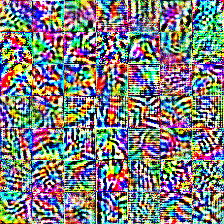

In [ ]:
pil_img = to_pil_image(torch.nn.functional.sigmoid(img.squeeze(0)))
pil_img

## Smaller ViT patch size

In [ ]:
target_class = 76
model = torchvision.models.vit_b_16(pretrained=True).eval().to("cuda")

img = torch.randn(1, 3, 224, 224, requires_grad=True, device="cuda")


optimizer = torch.optim.AdamW(
    params=[img],
    lr=0.7,
)
normalize_fn = torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
############################################################################################################
##                                            Training loop                                               ##
############################################################################################################


for i in tqdm(range(2000)):
    normalized_img = normalize_fn(torch.nn.functional.sigmoid(img))
    logits = model(normalized_img)
    labels = torch.tensor([target_class], dtype=torch.uint8).to("cuda")
    loss = torch.nn.CrossEntropyLoss()(logits, labels)

    # Backpropagation and optimization step
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:02<00:00, 150MB/s]
100%|██████████| 2000/2000 [01:29<00:00, 22.45it/s]


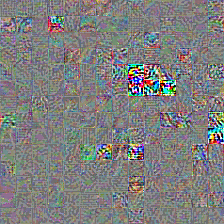

In [ ]:
pil_img = to_pil_image(torch.nn.functional.sigmoid(img.squeeze(0)))
pil_img

In [ ]:
'''
"76":"tarantula",
"8":"hen",
"293":"cheetah",
"345":"ox",
"403":"aircraft_carrier",
"508":"computer_keyboard",
"560":"football_helmet",
"688":"oscilloscope",
"726":"plane",
"764":"rifle",
"980":"volcano"
'''

'\n"76":"tarantula",\n"8":"hen",\n"293":"cheetah",\n"345":"ox",\n"403":"aircraft_carrier",\n"508":"computer_keyboard",\n"560":"football_helmet",\n"688":"oscilloscope",\n"726":"plane",\n"764":"rifle",\n"980":"volcano"\n'